# Preprocessing with scikit-learn - Cumulative Lab

## Introduction
In this cumulative lab, you'll practice applying various preprocessing techniques with scikit-learn (`sklearn`) to the Ames Housing dataset in order to prepare the data for predictive modeling. The main emphasis here is on preprocessing (not EDA or modeling theory), so we will skip over most of the visualization and metrics steps that you would take in an actual modeling process.

## Objectives

You will be able to:

* Practice identifying which preprocessing technique to use
* Practice filtering down to relevant columns
* Practice applying `sklearn.impute` to fill in missing values
* Practice applying `sklearn.preprocessing`:
  * `LabelBinarizer` for converting binary categories to 0 and 1 within a single column
  * `OneHotEncoder` for creating multiple "dummy" columns to represent multiple categories
  * `PolynomialFeatures` for creating interaction terms
  * `StandardScaler` for scaling data

## Your Task: Prepare the Ames Housing Dataset for Modeling

![house in Ames](images/ames_house.jpg)

<span>Photo by <a href="https://unsplash.com/@kjkempt17?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Kyle Kempt</a> on <a href="https://unsplash.com/s/photos/ames?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

### Requirements

#### 1. Drop Irrelevant Columns

For the purposes of this lab, we will only be using a subset of all of the features present in the Ames Housing dataset. In this step you will drop all irrelevant columns.

#### 2. Handle Missing Values

Often for reasons outside of a data scientist's control, datasets are missing some values. In this step you will assess the presence of NaN values in our subset of data, and use `MissingIndicator` and `SimpleImputer` from the `sklearn.impute` submodule to handle any missing values.

#### 3. Convert Categorical Features into Numbers

A built-in assumption of the scikit-learn library is that all data being fed into a machine learning model is already in a numeric format, otherwise you will get a `ValueError` when you try to fit a model. In this step you will use a `LabelBinarizer` to replace data within individual non-numeric columns with 0s and 1s, and a `OneHotEncoder` to replace columns containing more than 2 categories with multiple "dummy" columns containing 0s and 1s.

At this point, a scikit-learn model should be able to run without errors!

#### 4. Add Interaction Terms

This step gets into the feature engineering part of preprocessing. Does our model improve as we add interaction terms? In this step you will use a `PolynomialFeatures` transformer to augment the existing features of the dataset.

#### 5. Scale Data

Because we are using a model with regularization, it's important to scale the data so that coefficients are not artificially penalized based on the units of the original feature. In this step you will use a `StandardScaler` to standardize the units of your data.

#### 6. Preprocess Test Data

Apply Steps 1-5 to the test data in order to perform a final model evaluation.

## Lab Setup

### Getting the Data

In the cell below, we import the `pandas` library, open the CSV containing the Ames Housing data as a pandas `DataFrame`, and inspect its contents.

In [ ]:
# Run this cell without changes
import pandas as pd
df = pd.read_csv("data/ames.csv")
df

In [ ]:
# Run this cell without changes
df.describe()

The prediction target for this analysis is the sale price of the home, so we separate the data into `X` and `y` accordingly:

In [ ]:
# Run this cell without changes
y = df["SalePrice"]
X = df.drop("SalePrice", axis=1)

Next, we separate the data into a train set and a test set prior to performing any preprocessing steps:

In [ ]:
# Run this cell without changes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

(If you are working through this lab and you just want to start over with the original value for `X_train`, re-run the cell above.)

In [ ]:
# Run this cell without changes
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

#### Fitting a Model

For this lab we will be using an `ElasticNet` model from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)). You are welcome to read about the details of this model implementation at that link, but for the purposes of this lab, what you need to know is that this is a form of linear regression with *regularization* (meaning we will need to standardize the features).

Right now, we have not done any preprocessing, so we expect that trying to fit a model will fail:

In [ ]:
# Run this cell without changes
from sklearn.linear_model import ElasticNet

model = ElasticNet(random_state=1)
model.fit(X_train, y_train)

As you can see, we got `ValueError: could not convert string to float: 'RL'`.

In order to fit a scikit-learn model, all values must be numeric, and the third column of our full dataset (`MSZoning`) contains values like `'RL'` and `'RH'`, which are strings. So this error was expected, but after some preprocessing, this model will work!

## 1. Drop Irrelevant Columns

For the purpose of this analysis, we'll only use the following columns, described by `relevant_columns`. You can find the full description of their values in the file `data/data_description.txt` included in this repository.

In the cell below, reassign `X_train` so that it only contains the columns in `relevant_columns`.

**Hint:** Even though we describe this as "dropping" irrelevant columns, it's easier if you invert the logic, so that we are only keeping relevant columns, rather than using the `.drop()` method. It is possible to use the `.drop()` method if you really want to, but first you would need to create a list of the column names that you don't want to keep.

In [ ]:
# Replace None with appropriate code

# Declare relevant columns
relevant_columns = [
    'LotFrontage',  # Linear feet of street connected to property
    'LotArea',      # Lot size in square feet
    'Street',       # Type of road access to property
    'OverallQual',  # Rates the overall material and finish of the house
    'OverallCond',  # Rates the overall condition of the house
    'YearBuilt',    # Original construction date
    'YearRemodAdd', # Remodel date (same as construction date if no remodeling or additions)
    'GrLivArea',    # Above grade (ground) living area square feet
    'FullBath',     # Full bathrooms above grade
    'BedroomAbvGr', # Bedrooms above grade (does NOT include basement bedrooms)
    'TotRmsAbvGrd', # Total rooms above grade (does not include bathrooms)
    'Fireplaces',   # Number of fireplaces
    'FireplaceQu',  # Fireplace quality
    'MoSold',       # Month Sold (MM)
    'YrSold'        # Year Sold (YYYY)
]

# Reassign X_train so that it only contains relevant columns
None

# Visually inspect X_train
X_train

Check that the new shape is correct:

In [ ]:
# Run this cell without changes

# X_train should have the same number of rows as before
assert X_train.shape[0] == 1095

# Now X_train should only have as many columns as relevant_columns
assert X_train.shape[1] == len(relevant_columns)

## 2. Handle Missing Values

In the cell below, we check to see if there are any NaNs in the selected subset of data:

In [ ]:
# Run this cell without changes
X_train.isna().sum()

Ok, it looks like we have some NaNs in `LotFrontage` and `FireplaceQu`.

Before we proceed to fill in those values, we need to ask: **do these NaNs actually represent** ***missing*** **values, or is there some real value/category being represented by NaN?**

### Fireplace Quality

To start with, let's look at `FireplaceQu`, which means "Fireplace Quality". Why might we have NaN fireplace quality?

Well, some properties don't have fireplaces!

Let's confirm this guess with a little more analysis.

First, we know that there are 512 records with NaN fireplace quality. How many records are there with zero fireplaces?

In [ ]:
# Run this cell without changes
X_train[X_train["Fireplaces"] == 0]

Ok, that's 512 rows, same as the number of NaN `FireplaceQu` records. To double-check, let's query for that combination of factors (zero fireplaces and `FireplaceQu` is NaN):

In [ ]:
# Run this cell without changes
X_train[
    (X_train["Fireplaces"] == 0) &
    (X_train["FireplaceQu"].isna())
]

Looks good, still 512 records. So, NaN fireplace quality is not actually information that is missing from our dataset, it is a genuine category which means "fireplace quality is not applicable". This interpretation aligns with what we see in `data/data_description.txt`:

```
...
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
...
```

So, let's replace those NaNs with the string "N/A" to indicate that this is a real category, not missing data:

In [ ]:
# Run this cell without changes
X_train["FireplaceQu"] = X_train["FireplaceQu"].fillna("N/A")
X_train["FireplaceQu"].value_counts()

Eventually we will still need to perform some preprocessing to prepare the `FireplaceQu` column for modeling (because models require numeric inputs rather than inputs of type `object`), but we don't need to worry about filling in missing values.

### Lot Frontage

Now let's look at `LotFrontage` — it's possible that NaN is also a genuine category here, and it's possible that it's just missing data instead. Let's apply some domain understanding to understand whether it's possible that lot frontage can be N/A just like fireplace quality can be N/A.

Lot frontage is defined as the "Linear feet of street connected to property", i.e. how much of the property runs directly along a road. The amount of frontage required for a property depends on its zoning. Let's look at the zoning of all records with NaN for `LotFrontage`:

In [ ]:
# Run this cell without changes
df[df["LotFrontage"].isna()]["MSZoning"].value_counts()

So, we have RL (residential low density), RM (residential medium density), FV (floating village residential), and RH (residential high density). Looking at the building codes from the City of Ames, it appears that all of these zones require at least 24 feet of frontage.

Nevertheless, we can't assume that all properties have frontage just because the zoning regulations require it. Maybe these properties predate the regulations, or they received some kind of variance permitting them to get around the requirement. **It's still not as clear here as it was with the fireplaces whether this is a genuine "not applicable" kind of NaN or a "missing information" kind of NaN.**

In a case like this, we can take a double approach:

1. Make a new column in the dataset that simply represents whether `LotFrontage` was originally NaN
2. Fill in the NaN values of `LotFrontage` with median frontage in preparation for modeling

### Missing Indicator for `LotFrontage`

First, we import `sklearn.impute.MissingIndicator` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html)). The goal of using a `MissingIndicator` is creating a new column to represent which values were NaN (or some other "missing" value) in the original dataset, in case NaN ends up being a meaningful indicator rather than a random missing bit of data.

A `MissingIndicator` is a scikit-learn transformer, meaning that we will use the standard steps for any scikit-learn transformer:

1. Identify data to be transformed (typically not every column is passed to every transformer)
2. Instantiate the transformer object
3. Fit the transformer object (on training data only)
4. Transform data using the transformer object
5. Add the transformed data to the other data that was not transformed

In [ ]:
# Replace None with appropriate code
from sklearn.impute import MissingIndicator

# (1) Identify data to be transformed
# We only want missing indicators for LotFrontage
frontage_train = X_train[["LotFrontage"]]

# (2) Instantiate the transformer object
missing_indicator = MissingIndicator()

# (3) Fit the transformer object on frontage_train
None

# (4) Transform frontage_train and assign the result
# to frontage_missing_train
frontage_missing_train = None

# Visually inspect frontage_missing_train
frontage_missing_train

The result of transforming `frontage_train` should be an array of arrays, each containing `True` or `False`. Make sure the `assert`s pass before moving on to the next step.

In [ ]:
# Run this cell without changes
import numpy as np

# frontage_missing_train should be a NumPy array
assert type(frontage_missing_train) == np.ndarray

# We should have the same number of rows as the full X_train
assert frontage_missing_train.shape[0] == X_train.shape[0]

# But we should only have 1 column
assert frontage_missing_train.shape[1] == 1

Now let's add this new information as a new column of `X_train`:

In [ ]:
# Run this cell without changes

# (5) add the transformed data to the other data
X_train["LotFrontage_Missing"] = frontage_missing_train
X_train

In [ ]:
# Run this cell without changes

# Now we should have 1 extra column compared to
# our original subset
assert X_train.shape[1] == len(relevant_columns) + 1

### Imputing Missing Values for LotFrontage

Now that we have noted where missing values were originally present, let's use a `SimpleImputer` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)) to fill in those NaNs in the `LotFrontage` column.

The process is very similar to the `MissingIndicator` process, except that we want to replace the original `LotFrontage` column with the transformed version instead of just adding a new column on.

In the cell below, create and use a `SimpleImputer` with `strategy="median"` to transform the value of `frontage_train` (declared above).

In [ ]:
# Replace None with appropriate code

from sklearn.impute import SimpleImputer

# (1) frontage_train was created previously, so we don't
# need to extract the relevant data again

# (2) Instantiate a SimpleImputer with strategy="median"
imputer = None

# (3) Fit the imputer on frontage_train
None

# (4) Transform frontage_train using the imputer and
# assign the result to frontage_imputed_train
frontage_imputed_train = None

# Visually inspect frontage_imputed_train
frontage_imputed_train

Now we can replace the original value of `LotFrontage` in `X_train` with the new value:

In [ ]:
# Run this cell without changes

# (5) Replace value of LotFrontage
X_train["LotFrontage"] = frontage_imputed_train

# Visually inspect X_train
X_train

Now the shape of `X_train` should still be the same as before:

In [ ]:
# Run this cell without changes
assert X_train.shape == (1095, 16)

And now our only NaN values should be in `FireplaceQu`, which are NaN values but not missing values:

In [ ]:
# Run this cell without changes
X_train.isna().sum()

Great! Now we have completed Step 2.

## 3. Convert Categorical Features into Numbers

Despite dropping irrelevant columns and filling in those NaN values, if we feed the current `X_train` into our scikit-learn `ElasticNet` model, it will crash:

In [ ]:
# Run this cell without changes
model.fit(X_train, y_train)

Now the first column to cause a problem is `Street`, which is documented like this:

```
...
Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
...
```

Let's look at the full `X_train`:

In [ ]:
# Run this cell without changes
X_train.info()

So, our model is crashing because some of the columns are non-numeric.

Anything that is already `float64` or `int64` will work with our model, but these features need to be converted:

* `Street` (currently type `object`)
* `FireplaceQu` (currently type `object`)
* `LotFrontage_Missing` (currently type `bool`)

There are two main approaches to converting these values, depending on whether there are 2 values (meaning the categorical variable can be converted into a single binary number) or more than 2 values (meaning we need to create extra columns to represent all categories). (If there is only 1 value, this is not a useful feature for the purposes of predictive analysis.)

In the cell below, we inspect the value counts of the specified features:

In [ ]:
# Run this cell without changes

print(X_train["Street"].value_counts())
print()
print(X_train["FireplaceQu"].value_counts())
print()
print(X_train["LotFrontage_Missing"].value_counts())

So, it looks like `Street` and `LotFrontage_Missing` have only 2 categories and can be converted into binary in place, whereas `FireplaceQu` has 6 categories and will need to be expanded into multiple columns.

### Binary Categories

For binary categories, we will use `LabelBinarizer` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html)) to convert the categories of `Street` and `LotFrontage_Missing` into binary values (0s and 1s).

Just like in Step 2 when we used the `MissingIndicator` and `SimpleImputer`, we will follow these steps:

1. Identify data to be transformed
2. Instantiate the transformer object
3. Fit the transformer object (on training data only)
4. Transform data using the transformer object
5. Add the transformed data to the other data that was not transformed

Let's start with transforming `Street`:

In [ ]:
# Replace None with appropriate code

# (0) import LabelBinarizer from sklearn.preprocessing
None

# (1) Create a variable street_train that is the
# relevant column from X_train
street_train = None

# (2) Instantiate a LabelBinarizer
binarizer_street = None

# (3) Fit the binarizer on street_train
None

# Inspect the classes of the fitted binarizer
binarizer_street.classes_

The `.classes_` attribute of `LabelBinarizer` is only present once the `.fit` method has been called. (The trailing `_` indicates this convention.)

What this tells us is that when `binarizer_street` is used to transform the street data into 1s and 0s, `0` will mean `'Grvl'` (gravel) in the original data, and `1` will mean `'Pave'` (paved) in the original data.

The eventual scikit-learn model only cares about the 1s and 0s, but this information can be useful for us to understand what our code is doing and help us debug when things go wrong.

Now let's transform `street_train` with the fitted binarizer:

In [ ]:
# Replace None with appropriate code

# (4) Transform street_train using the binarizer and
# assign the result to street_binarized_train
street_binarized_train = None

# Visually inspect street_binarized_train
street_binarized_train

All of the values we see appear to be `1` right now, but that makes sense since there were only 4 properties with gravel (`0`) streets in `X_train`.

Now let's replace the original `Street` column with the binarized version:

In [ ]:
# Replace None with appropriate code

# (5) Replace value of Street
X_train["Street"] = None

# Visually inspect X_train
X_train

In [ ]:
# Run this cell without changes
X_train.info()

Perfect! Now `Street` should by type `int64` instead of `object`.

Now, repeat the same process with `LotFrontage_Missing`:

In [ ]:
# Replace None with appropriate code

# (1) We already have a variable frontage_missing_train
# from earlier, no additional step needed

# (2) Instantiate a LabelBinarizer for missing frontage
binarizer_frontage_missing = None

# (3) Fit the binarizer on frontage_missing_train
None

# Inspect the classes of the fitted binarizer
binarizer_frontage_missing.classes_

In [ ]:
# Replace None with appropriate code

# (4) Transform frontage_missing_train using the binarizer and
# assign the result to frontage_missing_binarized_train
frontage_missing_binarized_train = None

# Visually inspect frontage_missing_binarized_train
frontage_missing_binarized_train

In [ ]:
# Replace None with appropriate code

# (5) Replace value of LotFrontage_Missing
X_train["LotFrontage_Missing"] = None

# Visually inspect X_train
X_train

In [ ]:
# Run this cell without changes
X_train.info()

Great, now we only have 1 column remaining that isn't type `float64` or `int64`!

#### Note on Preprocessing Boolean Values
For binary values like `LotFrontage_Missing`, you might see a few different approaches to preprocessing. Python treats `True` and `1` as equal:

In [ ]:
# Run this cell without changes
print(True == 1)
print(False == 0)

This means that if your model is purely using Python, you actually might just be able to leave columns as type `bool` without any issues. You will likely see examples that do this. However if your model relies on C or Java "under the hood", this might cause problems.

There is also a technique using `pandas` rather than scikit-learn for this particular conversion of boolean values to integers:

In [ ]:
# Run this cell without changes
df_example = pd.DataFrame(frontage_missing_train, columns=["LotFrontage_Missing"])
df_example

In [ ]:
# Run this cell without changes
df_example["LotFrontage_Missing"] = df_example["LotFrontage_Missing"].astype(int)
df_example

This code is casting every value in the `LotFrontage_Missing` column to an integer, achieving the same result as the `LabelBinarizer` example with less code.

The downside of using this approach is that it doesn't fit into a scikit-learn pipeline as neatly because it is using `pandas` to do the transformation instead of scikit-learn.

In the future, you will need to make your own determination of which strategy to use!

### Multiple Categories

Unlike `Street` and `LotFrontage_Missing`, `FireplaceQu` has more than two categories. Therefore the process for encoding it numerically is a bit more complicated, because we will need to create multiple "dummy" columns that are each representing one category.

To do this, we can use a `OneHotEncoder` from `sklearn.preprocessing` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)).

The first several steps are very similar to all of the other transformers we've used so far, although the process of combining the data with the original data differs.

In the cells below, complete steps `(0)`-`(4)` of preprocessing the `FireplaceQu` column using a `OneHotEncoder`:

In [ ]:
# Replace None with appropriate code

# (0) import OneHotEncoder from sklearn.preprocessing
None

# (1) Create a variable fireplace_qu_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
fireplace_qu_train = X_train[["FireplaceQu"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = None

# (3) Fit the encoder on fireplace_qu_train
None

# Inspect the categories of the fitted encoder
ohe.categories_

In [ ]:
# Replace None with appropriate code

# (4) Transform fireplace_qu_train using the encoder and
# assign the result to fireplace_qu_encoded_train
fireplace_qu_encoded_train = None

# Visually inspect fireplace_qu_encoded_train
fireplace_qu_encoded_train

Notice that this time, unlike with `MissingIndicator`, `SimpleImputer`, or `LabelBinarizer`, we have created multiple columns of data out of a single column. The code below converts this unlabeled NumPy array into a readable pandas dataframe in preparation for merging it back with the rest of `X_train`:

In [ ]:
# Run this cell without changes

# (5a) Make the transformed data into a dataframe
fireplace_qu_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    fireplace_qu_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
fireplace_qu_encoded_train

A couple notes on the code above:

* The main goal of converting this into a dataframe (rather than converting `X_train` into a NumPy array, which would also allow them to be combined) is **readability** — to help you and others understand what your code is doing, and to help you debug. Eventually when you write this code as a pipeline, it will be NumPy arrays "under the hood".
* We are using just the **raw categories** from `FireplaceQu` as our new dataframe columns, but you'll also see examples where a lambda function or list comprehension is used to create column names indicating the original column name, e.g. `FireplaceQu_Ex`, `FireplaceQu_Fa` rather than just `Ex`, `Fa`. This is a design decision based on readability — the scikit-learn model will work the same either way.
* It is very important that **the index of the new dataframe matches the index of the main `X_train` dataframe**. Because we used `train_test_split`, the index of `X_train` is shuffled, so it goes `1023`, `810`, `1384` etc. instead of `0`, `1`, `2`, etc. If you don't specify an index for the new dataframe, it will assign the first record to the index `0` rather than `1023`. If you are ever merging encoded data like this and a bunch of NaNs start appearing, make sure that the indexes are lined up correctly! You also may see examples where the index of `X_train` has been reset, rather than specifying the index of the new dataframe — either way works.

Next, we want to drop the original `FireplaceQu` column containing the categorical data:

(For previous transformations we didn't need to drop anything because we were replacing 1 column with 1 new column in place, but one-hot encoding works differently.)

In [ ]:
# Run this cell without changes

# (5b) Drop original FireplaceQu column
X_train.drop("FireplaceQu", axis=1, inplace=True)

# Visually inspect X_train
X_train

Finally, we want to concatenate the new dataframe together with the original `X_train`:

In [ ]:
# Run this cell without changes

# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, fireplace_qu_encoded_train], axis=1)

# Visually inspect X_train
X_train

In [ ]:
# Run this cell without changes
X_train.info()

Ok, everything is numeric now! We have completed the minimum necessary preprocessing to use these features in a scikit-learn model!

In [ ]:
# Run this cell without changes
model.fit(X_train, y_train)

Great, no error this time.

Let's use cross validation to take a look at the model's performance:

In [ ]:
# Run this cell without changes
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=3)

Not terrible, we are explaining between 66% and 81% of the variance in the target with our current feature set.

## 4. Add Interaction Terms

Now that we have completed the minimum preprocessing to run a model without errors, let's try to improve the model performance.

Linear models (including `ElasticNet`) are limited in the information they can learn because they are assuming a linear relationship between features and target. Often our real-world features aren't related to the target this way:

In [ ]:
# Run this cell without changes
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X_train["LotArea"], y_train, alpha=0.2)
ax.set_xlabel("Lot Area")
ax.set_ylabel("Sale Price")
ax.set_title("Lot Area vs. Sale Price for Ames Housing Data");

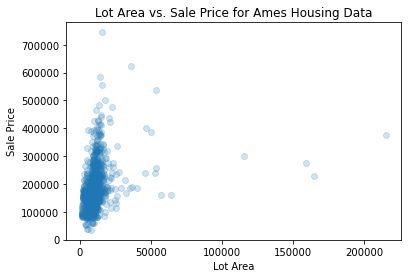

In [44]:
# __SOlUTION__
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X_train["LotArea"], y_train, alpha=0.2)
ax.set_xlabel("Lot Area")
ax.set_ylabel("Sale Price")
ax.set_title("Lot Area vs. Sale Price for Ames Housing Data");

Sometimes we can improve the linearity by introducing an *interaction term*. In this case, multiplying the lot area by the overall quality:

In [ ]:
# Run this cell without changes

fig, ax = plt.subplots()
ax.scatter(X_train["LotArea"]*X_train["OverallQual"], y_train, alpha=0.2)
ax.set_xlabel("Lot Area x Overall Quality")
ax.set_ylabel("Sale Price")
ax.set_title("(Lot Area x Overall Quality) vs. Sale Price for Ames Housing Data");

While we could manually add individual interaction terms, there is a preprocessor from scikit-learn called `PolynomialFeatures` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) that will generate all combinations of interaction terms (as well as polynomial terms, e.g. `Lot Area` squared) for a set of columns.

Specifically, let's generate interaction terms for `LotFrontage`, `LotArea`, `OverallQual`, `YearBuilt`, and `GrLivArea`.

To use `PolynomialFeatures`, we'll follow the same steps as `OneHotEncoder` (creating a new dataframe before merging), because it is another transformer that creates additional columns.

In [ ]:
# Replace None with appropriate code

# (0) import PolynomialFeatures from sklearn.preprocessing
None

# (1) Create a variable poly_columns
# extracted from X_train
poly_column_names = [
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "YearBuilt",
    "GrLivArea"
]
poly_columns_train = X_train[poly_column_names]

# (2) Instantiate a PolynomialFeatures transformer poly
# with interaction_only=True and include_bias=False
poly = None

# (3) Fit the transformer on poly_columns_train
None

# Inspect the features created by the fitted transformer
poly.get_feature_names(poly_column_names)

In [ ]:
# Replace None with appropriate code

# (4) Transform poly_columns using the transformer and
# assign the result poly_columns_expanded_train
poly_columns_expanded_train = None

# Visually inspect poly_columns_expanded_train
poly_columns_expanded_train

In [ ]:
# Replace None with appropriate code

# (5a) Make the transformed data into a dataframe
poly_columns_expanded_train = pd.DataFrame(
    # Pass in NumPy array created in previous step
    None,
    # Set the column names to the features created by poly
    columns=poly.get_feature_names(poly_column_names),
    # Set the index to match X_train's index
    index=None
)

# Visually inspect new dataframe
poly_columns_expanded_train

In [ ]:
# Run this cell without changes

# (5b) Drop original columns
X_train.drop(poly_column_names, axis=1, inplace=True)

# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, poly_columns_expanded_train], axis=1)

# Visually inspect X_train
X_train

In [ ]:
# Run this cell without changes
X_train.info()

Great, now we have 31 features instead of 21 features! Let's see how the model performs now:

In [ ]:
# Run this cell without changes
cross_val_score(model, X_train, y_train, cv=3)

Hmm, got some metrics, so it didn't totally crash, but what is that warning message?

A `ConvergenceWarning` means that the **gradient descent** algorithm within the `ElasticNet` model failed to find a minimum based on the specified parameters. While the warning message suggests modifyig the parameters (number of iterations), your first thought when you see a model fail to converge should be **do I need to scale the data**?

Scaling data is especially important when there are substantial differences in the units of different features. Let's take a look at the values in our current `X_train`:

In [ ]:
# Run this cell without changes
X_train.describe()

Looks like we have mean values ranging from about $0.6$ (for fireplaces) to $2.1 x 10^7$ (21 million, for `Lot Area x YearBuilt`). With the regularization applied by `ElasticNet`, the coefficients are being penalized very disproportionately!

In the next step, we'll apply scaling to address this.

## 5. Scale Data

This is the final scikit-learn preprocessing task of the lab! The `StandardScaler` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) standarizes features by removing the mean and scaling to unit variance. This will help our data to meet the assumptions of the L1 and L2 regularizers in our `ElasticNet` model.

Unlike previous preprocessing steps, we are going to apply the `StandardScaler` to the entire `X_train`, not just a single column or a subset of columns.

In [ ]:
# Replace None with appropriate code

# (0) import StandardScaler from sklearn.preprocessing
None

# (1) We don't actually have to select anything since 
# we're using the full X_train

# (2) Instantiate a StandardScaler
scaler = None

# (3) Fit the scaler on X_train
None

# (4) Transform X_train using the scaler and
# assign the result to X_train_scaled
X_train_scaled = None

# Visually inspect X_train_scaled
X_train_scaled

In [ ]:
# Run this cell without changes

# (5) Make the transformed data back into a dataframe
X_train = pd.DataFrame(
    # Pass in NumPy array
    X_train_scaled,
    # Set the column names to the original names
    columns=X_train.columns,
    # Set the index to match X_train's original index
    index=X_train.index
)

# Visually inspect new dataframe
X_train

In [ ]:
# Run this cell without changes
X_train.describe()

Great, now the means of the values are all much more centered. Let's see how the model performs now:

In [ ]:
# Run this cell without changes
cross_val_score(model, X_train, y_train, cv=3)

Well, that was only a minor improvement over our first model. Seems like the interaction terms didn't provide that much information after all! There is plenty more feature engineering you could do if this were a real project, but we'll stop there.

### Quick Scaling FAQs:

1. **Do you only need to scale if you're using `PolynomialFeatures`?** No, we should have scaled regardless. `PolynomialFeatures` just exaggerated the difference in the units and caused the model to produce a warning, but it's a best practice to scale whenever your model has any distance-based metric. (In this case, the regularization within `ElasticNet` is distance-based.)
2. **Do you really need to scale one-hot encoded features, if they are already just 0 or 1?** Professional opinions vary on this. Binary values already violate the assumptions of some models, so you might want to investigate empirically with your particular data and model whether you get better performance by scaling the one-hot encoded features or leaving them as just 0 and 1.

## 6. Preprocess Test Data

> Apply Steps 1-5 to the test data in order to perform a final model evaluation.

This part is done for you, and it should work automatically, assuming you didn't change the names of any of the transformer objects. Note that we are intentionally **not instantiating or fitting the transformers** here, because you always want to fit transformers on the training data only.

*Step 1: Drop Irrelevant Columns*

In [ ]:
# Run this cell without changes
X_test = X_test.loc[:, relevant_columns]

*Step 2: Handle Missing Values*

In [ ]:
# Run this cell without changes

# Replace FireplaceQu NaNs with "N/A"s
X_test["FireplaceQu"] = X_test["FireplaceQu"].fillna("N/A")

# Add missing indicator for lot frontage
frontage_test = X_test[["LotFrontage"]]
frontage_missing_test = missing_indicator.transform(frontage_test)
X_test["LotFrontage_Missing"] = frontage_missing_test

# Impute missing lot frontage values
frontage_imputed_test = imputer.transform(frontage_test)
X_test["LotFrontage"] = frontage_imputed_test

# Check that there are no more missing values
X_test.isna().sum()

*Step 3: Convert Categorical Features into Numbers*

In [ ]:
# Run this cell without changes

# Binarize street type
street_test = X_test["Street"]
street_binarized_test = binarizer_street.transform(street_test)
X_test["Street"] = street_binarized_test

# Binarize frontage missing
frontage_missing_test = X_test["LotFrontage_Missing"]
frontage_missing_binarized_test = binarizer_frontage_missing.transform(frontage_missing_test)
X_test["LotFrontage_Missing"] = frontage_missing_binarized_test

# One-hot encode fireplace quality
fireplace_qu_test = X_test[["FireplaceQu"]]
fireplace_qu_encoded_test = ohe.transform(fireplace_qu_test)
fireplace_qu_encoded_test = pd.DataFrame(
    fireplace_qu_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("FireplaceQu", axis=1, inplace=True)
X_test = pd.concat([X_test, fireplace_qu_encoded_test], axis=1)

# Visually inspect X_test
X_test

*Step 4: Add Interaction Terms*

In [ ]:
# Run this cell without changes

# (1) select relevant data
poly_columns_test = X_test[poly_column_names]

# (4) transform using fitted transformer
poly_columns_expanded_test = poly.transform(poly_columns_test) 

# (5) add back to original dataset
poly_columns_expanded_test = pd.DataFrame(
    poly_columns_expanded_test,
    columns=poly.get_feature_names(poly_column_names),
    index=X_test.index
)
X_test.drop(poly_column_names, axis=1, inplace=True)
X_test = pd.concat([X_test, poly_columns_expanded_test], axis=1)

# Visually inspect X_test
X_test

*Step 5: Scale Data*

In [ ]:
# Run this cell without changes
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)
X_test

Fit the model on the full training set, evaluate on test set:

In [ ]:
# Run this cell without changes
model.fit(X_train, y_train)
model.score(X_test, y_test)

Great, that worked! Now we have completed the full process of preprocessing the Ames Housing data in preparation for machine learning!

## Summary

In this cumulative lab, you used various techniques to prepare the Ames Housing data for modeling. You filtered down the full dataset to only relevant columns, filled in missing values, converted categorical data into numeric data, added interaction terms, and scaled the data. Each time, you practiced the scikit-learn transformer workflow by instantiating the transformer, fitting on the relevant training data, transforming the training data, and transforming the test data at the end (without re-instantiating or re-fitting the transformer object).